In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [2]:
df = pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv",nrows=20000)

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,20000.0,5.889400e+00,2.473979e+00,1.00,5.0000,7.000,8.0000,8.00
amount,20000.0,1.259584e+05,2.967104e+05,2.39,5272.0175,15825.175,141661.6450,10000000.00
oldbalanceOrg,20000.0,8.050588e+05,2.213398e+06,0.00,0.0000,19943.500,127412.6125,22352310.12
newbalanceOrig,20000.0,8.215246e+05,2.255167e+06,0.00,0.0000,5718.700,128794.9200,22465998.18
oldbalanceDest,20000.0,8.159052e+05,2.481246e+06,0.00,0.0000,0.000,288767.7500,22787471.89
newbalanceDest,20000.0,1.174361e+06,3.147339e+06,0.00,0.0000,0.000,428409.3200,28783585.38
isFraud,20000.0,4.050000e-03,6.351220e-02,0.00,0.0000,0.000,0.0000,1.00
isFlaggedFraud,20000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.0000,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            20000 non-null  int64  
 1   type            20000 non-null  object 
 2   amount          20000 non-null  float64
 3   nameOrig        20000 non-null  object 
 4   oldbalanceOrg   20000 non-null  float64
 5   newbalanceOrig  20000 non-null  float64
 6   nameDest        20000 non-null  object 
 7   oldbalanceDest  20000 non-null  float64
 8   newbalanceDest  20000 non-null  float64
 9   isFraud         20000 non-null  int64  
 10  isFlaggedFraud  20000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
all_Data = df.size
print(all_Data)

220000


In [8]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df['type'].value_counts()

type
PAYMENT     10440
CASH_OUT     3648
CASH_IN      3498
TRANSFER     1973
DEBIT         441
Name: count, dtype: int64

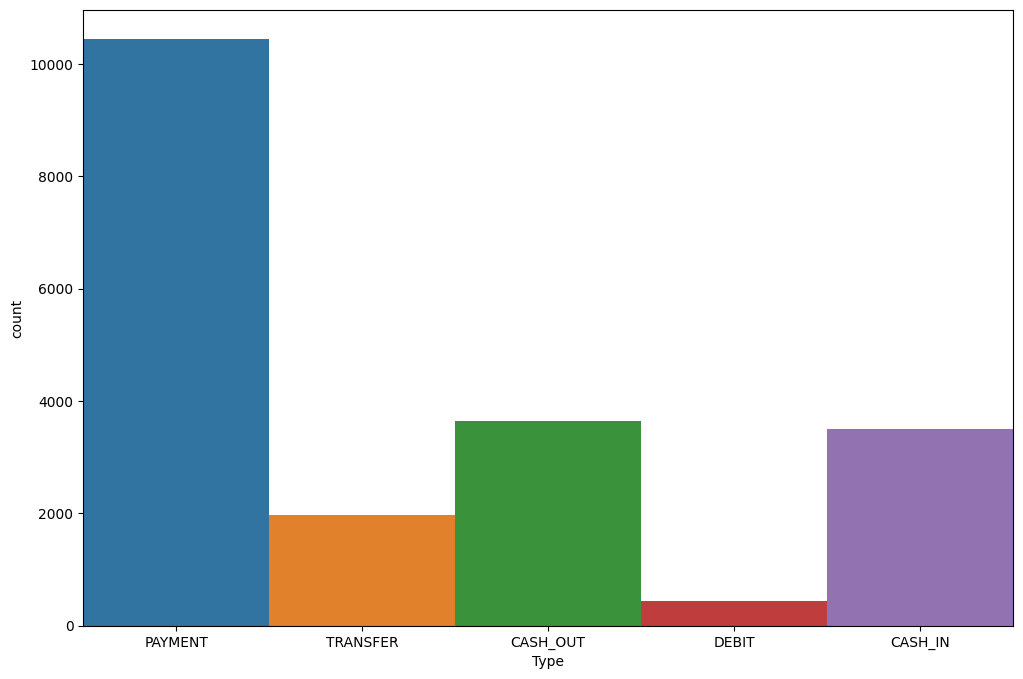

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="type", width= 1)
plt.xlabel('Type')
plt.show()

In [11]:
df['type'].replace({'PAYMENT':0, 'CASH_IN':1, 'CASH_OUT':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [12]:
df['type'].value_counts()

type
0    10440
2     3648
1     3498
3     1973
4      441
Name: count, dtype: int64

In [13]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [14]:
df.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,0,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,3,181.00,181.00,0.00,0.0,0.00,1,0
3,1,2,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,0,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,0,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,0,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,0,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,0,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,4,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


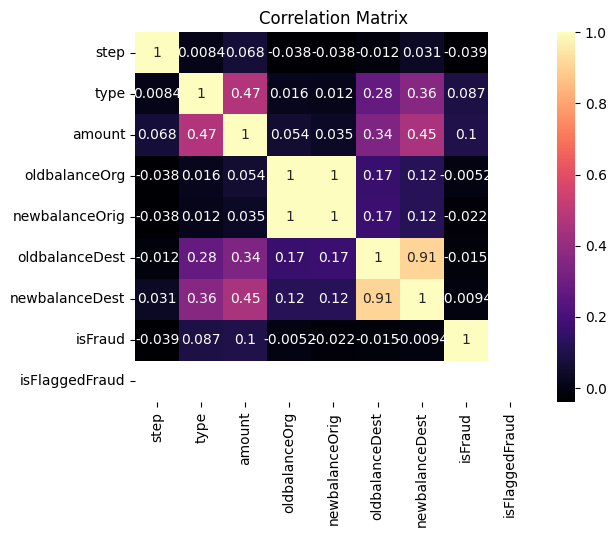

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

In [16]:
print(df.shape)

(20000, 9)


In [17]:
X = df.drop(['isFraud'], axis=1)
print(X.shape)

y = df['isFraud']
print(y.shape)

(20000, 8)
(20000,)


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier(criterion='entropy',max_depth='20', min_samples_split='5')

param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

En iyi parametreler: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
En iyi skor: 0.9981875


In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy}")

Confusion Matrix:
 [[3970    5]
 [   5   20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3975
           1       0.80      0.80      0.80        25

    accuracy                           1.00      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       1.00      1.00      1.00      4000

Doğruluk Skoru: 0.9975


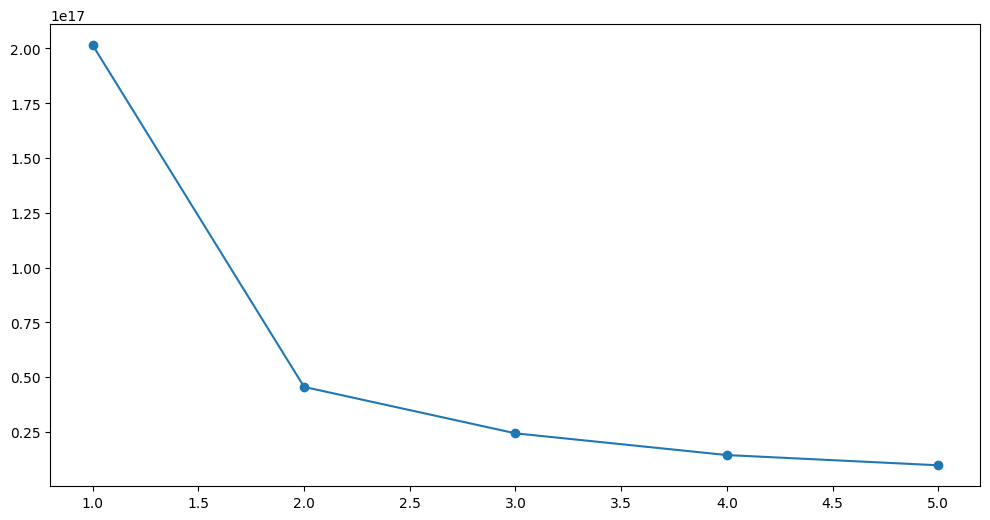

In [21]:
from sklearn.cluster import KMeans

n_list = []
X_numerical = X[numerical_features]
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_numerical) 
    n_list.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), n_list, marker='o')
plt.show()

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_numerical)
labels = kmeans.labels_

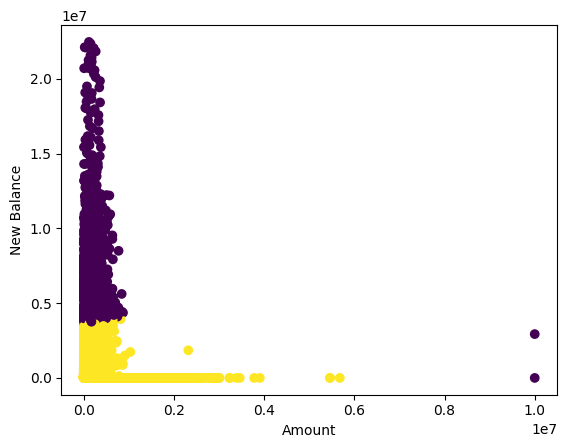

In [23]:
plt.scatter(X_numerical['amount'], X_numerical['newbalanceOrig'], c=labels, cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('New Balance')
plt.show()